In [1]:
import awkward as ak
import numpy as np
import coffea
import os
import pandas as pd
from plugins import handleData

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import hist

# testFiles = [
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_170to300_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/0CDD30E0-B953-E54B-BB7A-BFB45BE6EC93.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_300to470_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/3788BBD3-3B70-BE48-B01A-4FA395E1E0B6.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/F6B6A983-3E2B-7B4D-A2CE-E03AB6E32387.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/FDF7FBE4-9226-994A-BD45-29995A3CD62F.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/2CEB03D7-5B1A-EE46-9C21-13ED3E349AF4.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/DB87A517-0584-1A41-BB18-AAE7C9AAE5B8.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/BFE2E7E9-82CB-FE47-9B43-EBA5C373AF60.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/5213B536-BAA1-CC43-A58A-B1E41E2680F5.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/E8400F91-3216-EA46-A9F1-8CC7EF5261B0.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/B21BFDD8-B878-784C-AFB6-5CDE131F5C39.root"
# ]

redirector = 'root://xcache/'
files = handleData('fileset_QCD.json', redirector, testing = True, data = False)
# # files_test = handleData('fileset_QCD.json', redirector, testing = False, data = False)

events = NanoEventsFactory.from_root(list(files.values())[9][0], schemaclass=NanoAODSchema).events()
# print(files)
#may have to put in weights by hand
print(events.Generator.weight)

0.7.18
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [2]:
from coffea import processor, hist

#####
##### TO DO #####
# find misses --> need to do deltaR matching by hand --> if no reco miss
# need to make rivet routine


class DijetHists(processor.ProcessorABC):
    def __init__(self, data = False, ptcut=30., etacut = 2.5):
        # should have separate lower ptcut for gen
        self.ptcut = ptcut
        self.etacut = etacut
        self.data = data
        dataset_cat = hist.Cat("dataset", "Dataset")
        jet_cat = hist.Cat("jetNumb", "Jet")
        parton_cat = hist.Cat("partonFlav", "Parton Flavour")
        mass_bin = hist.Bin("mass", "Jet Mass (GeV)", 50, 0, 500.)
        mass_gen_bin = hist.Bin("mass", "Gen Jet Mass (GeV)", 100, 0, 500.)
        pt_bin = hist.Bin("pt", "Jet pT (GeV)", 60, 0, 2400.)
        bdisc_bin = hist.Bin("bdisc", "B-tag discriminator", 10, 0.0, 1.)
        frac_bin = hist.Bin("gfrac", "Gluon fraction", 10, 0.0, 1.)
        eta_bin = hist.Bin("eta", "Eta", 25, -2.5, 2.5)
        hist_dict = {
            'jet_pt':             hist.Hist("Events", jet_cat, parton_cat, pt_bin),
#            'jet_pt_m':           hist.Hist("Events", jet_cat, pt_bin, mass_bin),
            'jet_eta':            hist.Hist("Events", jet_cat, parton_cat, eta_bin),
            'jet_mass':           hist.Hist("Events", jet_cat, parton_cat, mass_bin),
#            'misses_pt_m':        hist.Hist("Events", pt_bin, mass_gen_bin),
#            'fakes_pt_m':         hist.Hist("Events", pt_bin, mass_bin),
            'jet_response':       hist.Hist("Events", pt_bin, mass_bin, pt_bin, mass_gen_bin),
            'weights':            hist.Hist("Events", dataset_cat, hist.Bin("weights", "reco weights", 60, 0, 1.)),
#            'gluonPurity':      hist.Hist("Events", jet_cat, frac_bin),
            'gluonPurity':        processor.defaultdict_accumulator(int),
            'nGluonJets':         processor.defaultdict_accumulator(int),
            'cutflow':            processor.defaultdict_accumulator(int),
            }
        if not self.data:
            hist_dict.update({
                'genjet_pt':          hist.Hist("Events", pt_bin),
                'genjet_eta':         hist.Hist("Events", eta_bin),
                'genjet_mass':        hist.Hist("Events", mass_gen_bin),
#            'misses_gen_pt_m':        hist.Hist("Events", pt_bin, mass_gen_bin),
#            'fakes_gen_pt_m':         hist.Hist("Events", pt_bin, mass_bin),
                'jet_response':       hist.Hist("Events", pt_bin, mass_bin, pt_bin, mass_gen_bin),
                'weights':            hist.Hist("Events", dataset_cat, hist.Bin("weights", "gen weights", 60, 0, 1.)),
                             })
        self._histos = processor.dict_accumulator(hist_dict)
    
    @property
    def accumulator(self):
        return self._histos
    
    # we will receive a NanoEvents instead of a coffea DataFrame
    def process(self, events):
        out = self.accumulator.identity()
        dijetEvents = events[(ak.num(events.FatJet) >= 2) & (ak.num(events.GenJetAK8) >= 2)]
        
#         for i in range(0,10):
#             print("Check that jets and are ordered by pt: ", events.FatJet[i,:].pt, "\n")
#             print("and that gen jets are order by pt:", events.GenJetAK8[i,:].pt, "\n")
        
        #get leading 2 jets
        fatJets = dijetEvents.FatJet[:,0:2]
        genJets = dijetEvents.GenJetAK8[:,0:2]
        
#         print("FatJet fields ", fatJets.fields, "\n")
#         print("GenJet fields ", genJets.fields, "\n")
        
        
        jet1 = dijetEvents.FatJet[:,0]
        jet2 = dijetEvents.FatJet[:,1]
        genjet1 = dijetEvents.GenJetAK8[:,0]
        genjet2 = dijetEvents.GenJetAK8[:,1]
        
        print("Initial # of dijet events ", len(fatJets), " and gen dijet events ", len(genJets), "\n")
        
        #calculate dphi_min
        dphi12 = (np.abs(jet1.delta_phi(jet2)) > 2.)
        dphi12_gen = (np.abs(genjet1.delta_phi(genjet2)) > 2.)
        
        #apply dphi gen and reco selection, pt cuts
        #see CMS PAS SMP-20-010 for selections
        
        
        #want to implement pt > 200GeV to be consistent with dijets?
        pt_cut = ak.all(dijetEvents.FatJet.pt > self.ptcut, axis = -1)
        pt_cut_gen = ak.all(dijetEvents.GenJetAK8.pt > self.ptcut, axis = -1)
        
        eta_cut = ak.all(np.abs(dijetEvents.FatJet.eta) < self.etacut, axis = -1)
        eta_cut_gen = ak.all(np.abs(dijetEvents.GenJetAK8.eta) < self.etacut, axis = -1)
        
        asymm = np.abs(jet1.pt - jet2.pt)/(jet1.pt + jet2.pt)
        asymm_gen  = np.abs(genjet1.pt - genjet2.pt)/(genjet1.pt + genjet2.pt)
        
        dijetEvents = dijetEvents[eta_cut & eta_cut_gen & (asymm < 0.3) & (asymm_gen < 0.3) & 
                                  pt_cut & dphi12 & pt_cut_gen & dphi12_gen]
        
        print("# of dijet events after eta cut", len(dijetEvents.FatJet), " and gen dijet events ", len(dijetEvents.GenJetAK8), "\n")
                
        #match jets
        matched = ~ak.any(ak.is_none(dijetEvents.FatJet.matched_gen, axis = -1), axis = -1)
        print("Length of matched ", len(matched))
        # NEED TO MAKE DELTA R MATCHING FOR GEN TO FIND MISSES
        #matched_gen = ~ak.is_none(DNE)
        
        
        # fakes are events reconstructed but does not exist in MC
        fakes = dijetEvents.FatJet[ak.any(ak.is_none(dijetEvents.FatJet.matched_gen, axis = -1), axis = -1)]
        print("Number of fake jets ", len(fakes))
        
        #miss = jet in MC but not reconstructed
        
        #misses = genJets[ak.is_none(DNE)]
        
        dijetEvents = dijetEvents[matched]
        print("Number of matched dijet events", len(dijetEvents))
#         print("Check for none values", ak.any(ak.is_none(dijetEvents, axis = -1)))
        
        jet = dijetEvents.FatJet[:,:2]
        genjet = dijetEvents.GenJetAK8[:,:2]
        
        jet1 = dijetEvents.FatJet[:,0]
        jet2 = dijetEvents.FatJet[:,1]
        genjet1 = dijetEvents.GenJetAK8[:,0]
        genjet2 = dijetEvents.GenJetAK8[:,1]
        
        #flavour --> 21 is gluon
        
        jet2_g     = jet2[np.abs(genjet2.partonFlavour) == 21]
        jet2_uds   = jet2[np.abs(genjet2.partonFlavour) < 4]
        jet2_c     = jet2[np.abs(genjet2.partonFlavour) == 4]
        jet2_b     = jet2[np.abs(genjet2.partonFlavour) == 5]
        jet2_other = jet2[(np.abs(genjet2.partonFlavour) > 5) & (np.abs(genjet2.partonFlavour) != 21)]
        
        jet1_g     = jet1[np.abs(genjet1.partonFlavour) == 21]
        jet1_uds   = jet1[np.abs(genjet1.partonFlavour) < 4]
        jet1_c     = jet1[np.abs(genjet1.partonFlavour) == 4]
        jet1_b     = jet1[np.abs(genjet1.partonFlavour) == 5]
        jet1_other = jet1[(np.abs(genjet1.partonFlavour) > 5) & (np.abs(genjet1.partonFlavour) != 21)]
        
#        #cant do jet_g = jet[jet.partonFlavor == 21] bc this would select events where either jet1 or jet2 is a gluon and keep both jets
#        #jet_g = ak.concatenate((jet1_g, jet2_g), axis = 0)
#        jet_cat = ak.concatenate((jet1, jet2), axis = 0)
#        print("check that total jet cat would work same way. length of concat'd jets", len(ak.concatenate((jet1, jet2), axis = 0)))
#        print(" and flattened jets ",  len(ak.flatten(dijetEvents.FatJet[:,:2])), "\n")
        
#        #make central and forward categories instead of jet1 jet2
#         print("Number of gluon jets = ", len(jet1_g)+len(jet2_g), " or ", len(jet_g))
        
        
        out['jet_mass'].fill(jetNumb = "jet1", partonFlav = "Gluon",  mass = jet1_g.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet1", partonFlav = "UDS",    mass = jet1_uds.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet1", partonFlav = "Charm",  mass = jet1_c.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet1", partonFlav = "Bottom", mass = jet1_b.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet1", partonFlav = "Other",  mass = jet1_other.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet2", partonFlav = "Gluon",  mass = jet2_g.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet2", partonFlav = "UDS",    mass = jet2_uds.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet2", partonFlav = "Charm",  mass = jet2_c.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet2", partonFlav = "Bottom", mass = jet2_b.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_mass'].fill(jetNumb = "jet2", partonFlav = "Other",  mass = jet2_other.mass,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        
        out['jet_pt'].fill(jetNumb = "jet1", partonFlav = "Gluon",  pt = jet1_g.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet1", partonFlav = "UDS",    pt = jet1_uds.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet1", partonFlav = "Charm",  pt = jet1_c.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet1", partonFlav = "Bottom", pt = jet1_b.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet1", partonFlav = "Other",  pt = jet1_other.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet2", partonFlav = "Gluon",  pt = jet2_g.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet2", partonFlav = "UDS",    pt = jet2_uds.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet2", partonFlav = "Charm",  pt = jet2_c.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet2", partonFlav = "Bottom", pt = jet2_b.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_pt'].fill(jetNumb = "jet2", partonFlav = "Other",  pt = jet2_other.pt,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )

        out['jet_eta'].fill(jetNumb = "jet1", partonFlav = "Gluon",  eta = jet1_g.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet1", partonFlav = "UDS",    eta = jet1_uds.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet1", partonFlav = "Charm",  eta = jet1_c.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet1", partonFlav = "Bottom", eta = jet1_b.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet1", partonFlav = "Other",  eta = jet1_other.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet2", partonFlav = "Gluon",  eta = jet2_g.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet2", partonFlav = "UDS",    eta = jet2_uds.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet2", partonFlav = "Charm",  eta = jet2_c.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet2", partonFlav = "Bottom", eta = jet2_b.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )
        out['jet_eta'].fill(jetNumb = "jet2", partonFlav = "Other",  eta = jet2_other.eta,
                             #weight = trijetEvents.Generator.weight[matched1]
                            )

        #NOTE --> need gen sd mass eventually --> recluster :( 
#         out['genjet_mass'].fill(
#             mass=ak.flatten(genjet.mass),
#             #weight=ak.flatten(dijetEvents.Generator.weight[~ak.is_none(dijetEvents.FatJet[:,0].matched_gen)])
#         )
            
#         out['weights'].fill(
#             dataset=events.metadata["dataset"],
#             weights=dijetEvents.Generator.weight,
#         )     
#         out['btag'].fill(
#             partonFlav = "Bottom",
#             bdisc=ak.flatten(jet_b.btagCSVV2),
#         )
        out['cutflow']['chunks'] += 1
        out['cutflow']['nGluonJets'] += (len(jet[np.abs(genjet.partonFlavour) == 21]))
        return out
    
    def postprocess(self, accumulator):
        return accumulator

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [3]:
# from plugins import runCoffeaJob
# #switch to if name and arg parse instead of separate function?
# result = runCoffeaJob(DijetHists(), jsonFile = "fileset_QCD.json", casa = True, testing = True)
# util.save(result, 'coffeaOutput/DiJet_pT30_eta25_result.coffea')


<Hist (pt) instance at 0x7f2722199700> <Hist (pt) instance at 0x7f271bd11df0>


/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom


(0.0, 1.0)

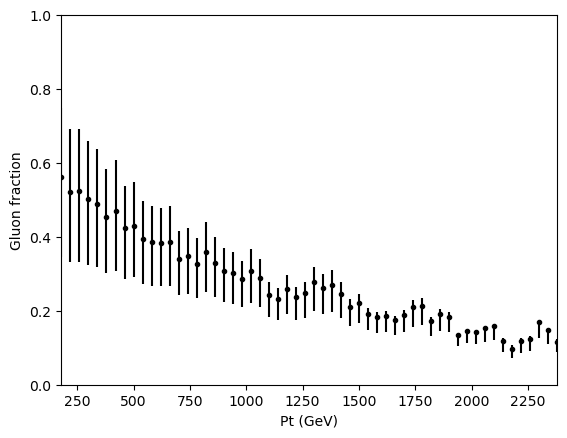

In [4]:
result = util.load('coffeaOutput/DiJet_pT30_eta25_result.coffea')
import matplotlib.pyplot as plt


numerator = result['jet_pt'].integrate('partonFlav','Gluon').sum('jetNumb')
denominator = result['jet_pt'].sum('partonFlav').sum('jetNumb')
print(numerator, denominator)

numerator.label = r'$\epsilon$'
ax = hist.plotratio(
    num=numerator,
    denom=denominator,
    error_opts={'color': 'k', 'marker': '.'},
    unc='poisson-ratio'
)

# glu = result['jet_pt'].sum('jetNumb').values()[('Gluon',)]
# tot_parton = result['jet_pt'].sum('jetNumb').values()[('All',)]

# print("Check for nan values in tot_parton ", np.isnan(tot_parton))

# glu_frac = np.where(tot_parton > 0, np.divide(glu,tot_parton), 0)

# print(len(result['jet_pt'].axis('pt').centers()))
# print(result['jet_pt'].to_hist())

# print(glu_frac)

# plt.scatter(result['jet_pt'].axis('pt').centers(), glu_frac)

plt.xlabel("Pt (GeV)")
plt.ylabel("Gluon fraction")
plt.ylim([0.,1.0])


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   1.   1.   2.   1.   5.   3.   1.   5.
   6.   5.   7.  12.   7.  14.  16.  22.  17.  27.  32.  42.  54.  71.
  94. 129. 200. 222. 219. 297. 206. 232. 202. 139. 132. 111.  83.  60.
  52.  51.  39.  20.] [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 4.000e+00 1.000e+01 9.000e+00 1.800e+01 2.000e+01
 2.200e+01 2.900e+01 4.800e+01 3.500e+01 4.000e+01 4.600e+01 5.400e+01
 8.100e+01 8.200e+01 9.600e+01 9.400e+01 1.670e+02 1.840e+02 2.740e+02
 4.100e+02 5.770e+02 8.810e+02 1.099e+03 1.354e+03 1.508e+03 1.483e+03
 1.474e+03 1.276e+03 1.084e+03 9.440e+02 7.820e+02 6.840e+02 5.510e+02
 4.640e+02 3.940e+02 2.910e+02 2.380e+02]


Text(0.5, 0.98, 'Gluon content as a function of pT')

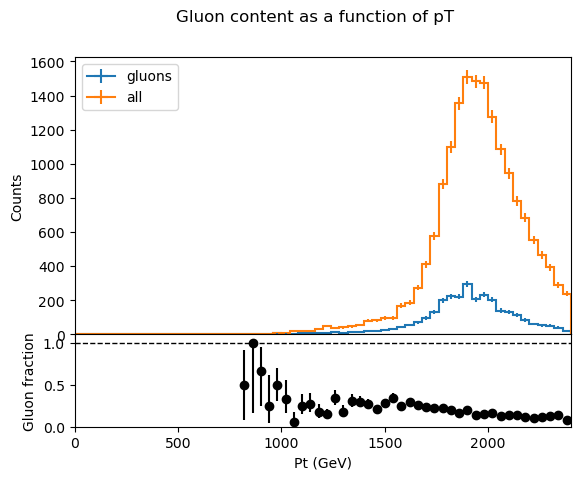

In [5]:
result = util.load('coffeaOutput/dijet_pT30_eta2p5_result_test.coffea')
import matplotlib.pyplot as plt


numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('pt')
denominator = result['jet_pt'].project('pt')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_ax = fig.add_subplot(grid[0])
subplot_ax = fig.add_subplot(grid[1], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')

[  0.   0.   0.   0.   0.   6.  33.  87. 160. 252. 353. 412. 402. 369.
 341. 243. 160.  61.  23.  15.   5.   0.   0.   0.   0.] [   0.    0.    0.    3.   25.   74.  289.  604. 1104. 1472. 1909. 2050.
 2149. 2120. 1902. 1554. 1074.  599.  299.  116.   26.    3.    0.    0.
    0.]


Text(0.5, 1.0, 'Gluon content as a function of eta')

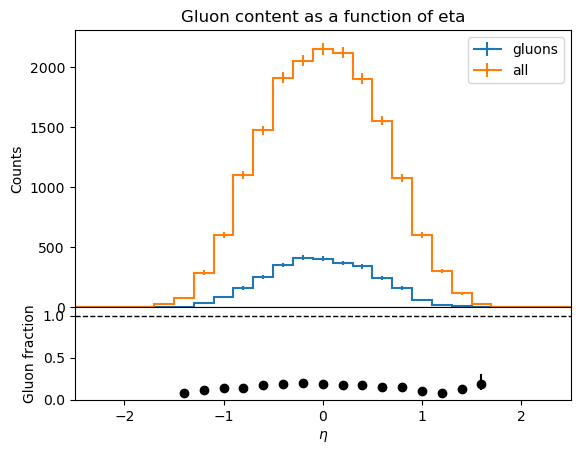

In [6]:
numerator = result['jet_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['jet_eta'].project('eta')
print(numerator.values(), denominator.values())
numerator.label = r'$\epsilon$'
numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_axis = fig.add_subplot(grid[0])
ratio_ax = fig.add_subplot(grid[1], sharex=main_axis)
plt.setp(main_axis.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_axis,"ratio_ax":ratio_ax}
)

plt.xlabel(r'$\eta$')
plt.ylabel("Gluon fraction")
main_axis.set_title('Gluon content as a function of eta')


In [29]:
#sum entries in bins --> plot as y-axis

%matplotlib inline
import matplotlib.pyplot as plt
import mplhep as hep
# plt.rcParams["figure.figsize"] = (20,5)


# fig, axs = plt.subplots(1, 3)
print(result['jet_mass'][{'jetNumb':sum}])
print(result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].to_numpy())
gluon, uds, charm, bottom, bins = result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].to_numpy()
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet mass (GeV)")

Hist(
  StrCategory(['/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM'], growth=True, name='dataset', label='Dataset'),
  StrCategory(['Gluon', 'UDS', 'Charm', 'Bottom'], growth=True, name='partonFlav', label='Parton Flavour'),
  Regular(50, 0, 500, name='mass', label='Jet Mass (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=16477, variance=16477) (WeightedSum(value=17372, variance=17372) with flow)
(array([[  0.,   0.,   1.,   0.,   5.,  11.,   8.,  31.,  56.,  76., 101.,
        114., 154., 128., 169., 150., 145., 119., 117.,  91.,  80.,  85.,
         77.,  80.,  74.,  70.,  64.,  53.,  51.,  53.,  39.,  48.,  48.,
         48.,  35.,  31.,  26.,  26.,  26.,  27.,  24.,  17.,  23.,  18.,
         21.,  27.,  15.,  19.,  13.,  12.],
       [  0.,   0.,   1.,   3.,  20.,  65., 131., 317., 469., 639., 778.,
        809., 785., 716., 657., 629., 476., 433., 362., 343., 289., 274.,
        237., 234., 175., 165., 143., 143.

ValueError: not enough values to unpack (expected 5, got 3)

AttributeError: 'Hist' object has no attribute 'dim'

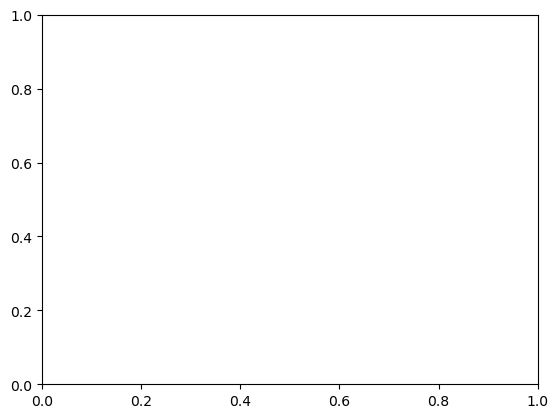

In [21]:
fig, ax = plt.subplots(1, 1)
hist.plot1d(result['jet_pt'][{'jetNumb':sum}], stack = True)
ax.set_xlabel("Jet pT (GeV)")
# ax.set_xscale("log")
# ax.set_xlim([170., 2000.])

In [ ]:
#plot pt, eta, phi, fake rate, pt efficiency, gluon purity for difference selections with b tags for all jets 
#and each individual jet in the 3 jets